In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray

In [15]:
def histogram_segmentation(image_gray, threshold):
    """
    Gri seviye bir görüntüye basit eşikleme uygular.
    """
    # Eşik değerinin altındaki pikseller 0 (siyah), üstündekiler 255 (beyaz) olur.
    _, segmented_image = cv2.threshold(image_gray, threshold, 255, cv2.THRESH_BINARY)
    return segmented_image

In [16]:
def kmeans_color_segmentation(image, k=5):
    """
    Pikselleri sadece renk (RGB) özelliklerine göre kümeleyerek segmentasyon yapar.
    """
    pixel_values = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(pixel_values)
    centers = np.uint8(kmeans.cluster_centers_)
    segmented_data = centers[kmeans.labels_.flatten()]
    segmented_image = segmented_data.reshape(image.shape)
    return segmented_image

def kmeans_color_position_segmentation(image, k=5):
    """
    Pikselleri renk (RGB) ve konum (x, y) özelliklerine göre kümeleyerek segmentasyon yapar.
    """
    h, w, _ = image.shape
    y_coords, x_coords = np.mgrid[0:h, 0:w]
    features = np.concatenate([image, y_coords[..., np.newaxis], x_coords[..., np.newaxis]], axis=2)
    features_reshaped = features.reshape(-1, 5)
    
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(features_reshaped)
    centers = np.uint8(kmeans.cluster_centers_[:, :3])
    segmented_data = centers[kmeans.labels_.flatten()]
    segmented_image = segmented_data.reshape(image.shape)
    return segmented_image

def kmeans_texture_segmentation(image, k=5):
    """
    Pikselleri doku (LBP) ve renk özelliklerine göre kümeleyerek segmentasyon yapar.
    """
    image_gray = rgb2gray(image)
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image_gray, n_points, radius, method='uniform')
    
    features = np.concatenate([image, lbp[..., np.newaxis]], axis=2)
    features_reshaped = features.reshape(-1, 4)
    
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(features_reshaped)
    centers = np.uint8(kmeans.cluster_centers_[:, :3])
    segmented_data = centers[kmeans.labels_.flatten()]
    segmented_image = segmented_data.reshape(image.shape)
    return segmented_image

Görüntü başarıyla yüklendi.


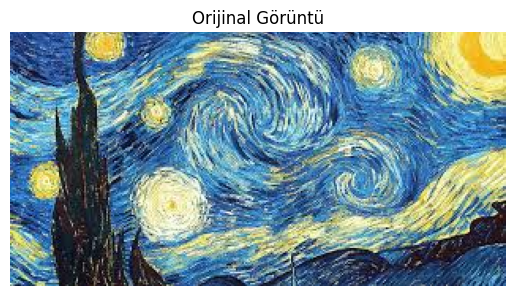

In [17]:

try:
    image_bgr = cv2.imread('image.jpg')
    if image_bgr is None:
        raise FileNotFoundError("Görüntü dosyası 'image.png' bulunamadı.")
    
    # OpenCV BGR formatında yükler, biz RGB ile çalışacağız.
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
    
    print("Görüntü başarıyla yüklendi.")
    plt.imshow(image_rgb)
    plt.title("Orijinal Görüntü")
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"Hata: {e}")

C:\Users\fsagl\AppData\Local\Temp\ipykernel_13456\908229892.py:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(image_gray.ravel(), 256, [0, 256])


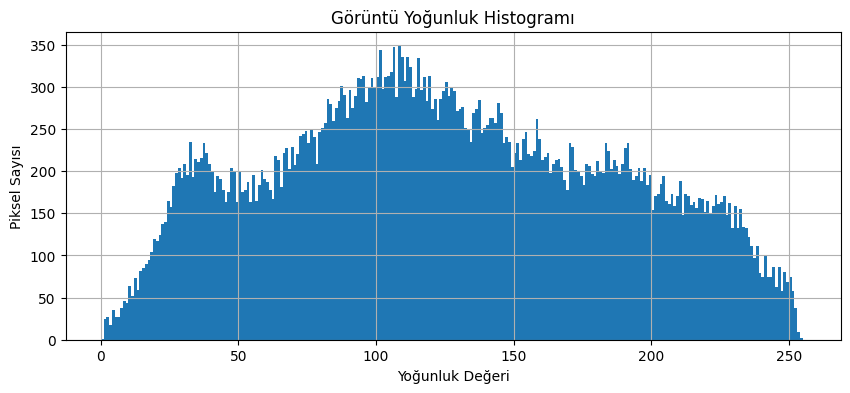

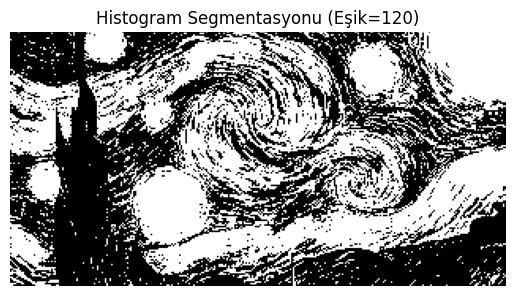

In [18]:
plt.figure(figsize=(10, 4))
plt.title('Görüntü Yoğunluk Histogramı')
plt.hist(image_gray.ravel(), 256, [0, 256])
plt.xlabel('Yoğunluk Değeri')
plt.ylabel('Piksel Sayısı')
plt.grid(True)
plt.show()

# Histogramdan göz kararı bir eşik seçelim, örneğin 120
threshold_value = 120
histogram_seg_img = histogram_segmentation(image_gray, threshold_value)

plt.imshow(histogram_seg_img, cmap='gray')
plt.title(f'Histogram Segmentasyonu (Eşik={threshold_value})')
plt.axis('off')
plt.show()

In [19]:
# Görüntüde kaç ana renk/bölge olduğunu tahmin ediyoruz
k_value = 6 

print("K-Means segmentasyonları başlıyor. Bu işlem biraz zaman alabilir...")

# 1. Sadece Renk Özellikleriyle K-Means
print("1. K-Means (Sadece Renk) işleniyor...")
kmeans_color_seg_img = kmeans_color_segmentation(image_rgb, k=k_value)

# 2. Renk + Konum Özellikleriyle K-Means
print("2. K-Means (Renk + Konum) işleniyor...")
kmeans_color_pos_seg_img = kmeans_color_position_segmentation(image_rgb, k=k_value)

# 3. Renk + Doku Özellikleriyle K-Means
print("3. K-Means (Renk + Doku) işleniyor...")
kmeans_texture_seg_img = kmeans_texture_segmentation(image_rgb, k=k_value)

print("Tüm K-Means segmentasyon işlemleri tamamlandı.")

K-Means segmentasyonları başlıyor. Bu işlem biraz zaman alabilir...
1. K-Means (Sadece Renk) işleniyor...
2. K-Means (Renk + Konum) işleniyor...
3. K-Means (Renk + Doku) işleniyor...
Tüm K-Means segmentasyon işlemleri tamamlandı.


c:\Users\fsagl\anaconda3\envs\py310\lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


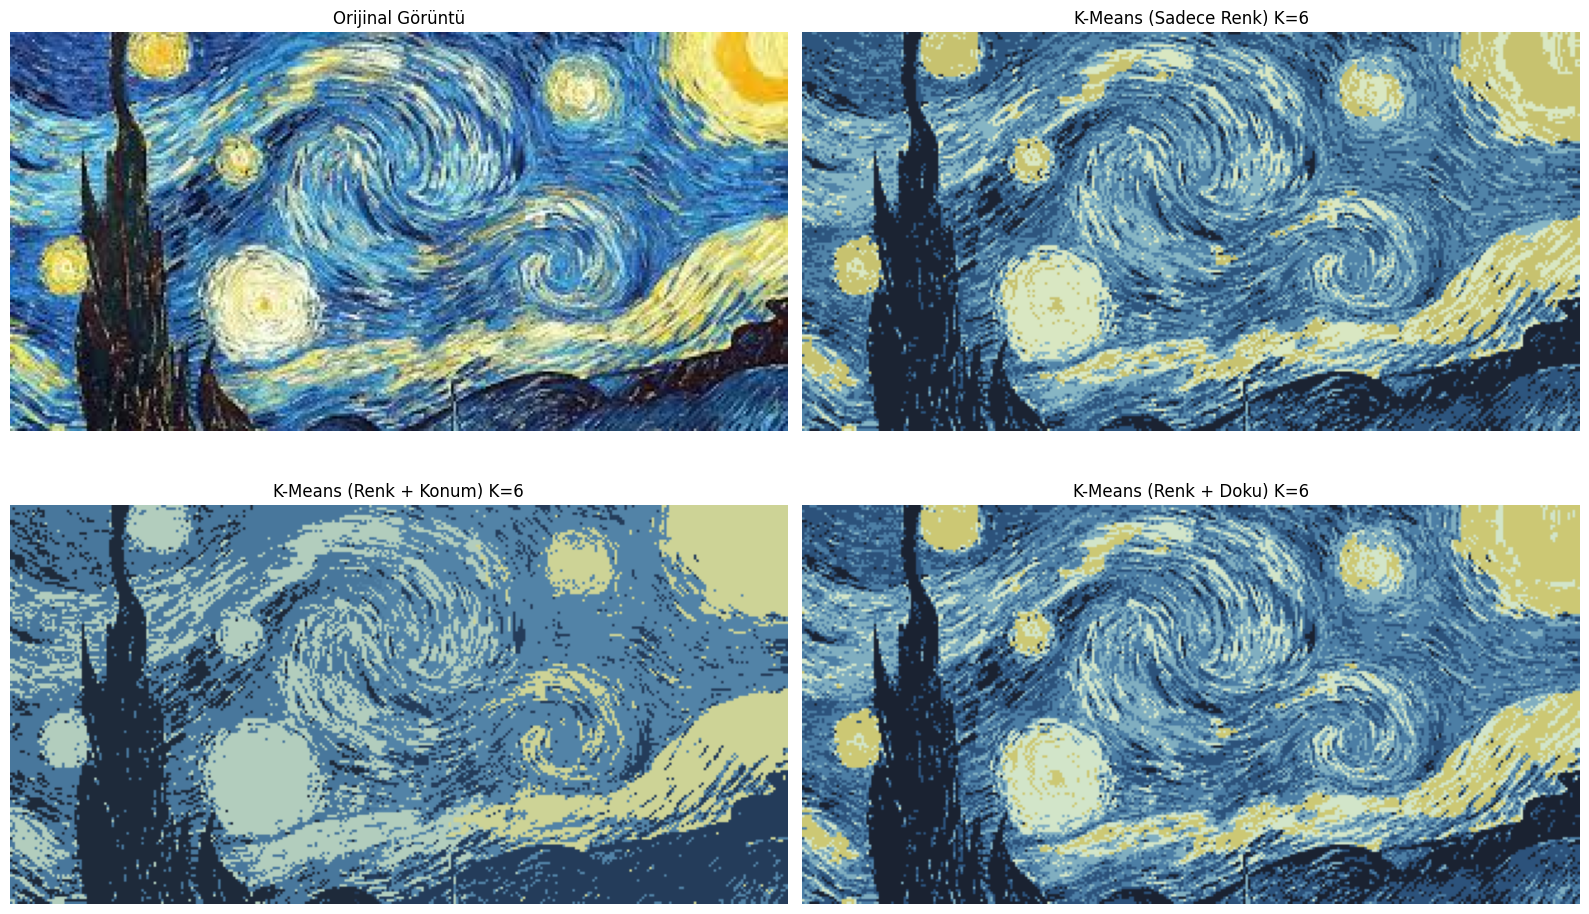

In [20]:
plt.figure(figsize=(16, 10))

# Orijinal Görüntü
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Orijinal Görüntü')
plt.axis('off')

# K-Means (Sadece Renk)
plt.subplot(2, 2, 2)
plt.imshow(kmeans_color_seg_img)
plt.title(f'K-Means (Sadece Renk) K={k_value}')
plt.axis('off')

# K-Means (Renk + Konum)
plt.subplot(2, 2, 3)
plt.imshow(kmeans_color_pos_seg_img)
plt.title(f'K-Means (Renk + Konum) K={k_value}')
plt.axis('off')

# K-Means (Renk + Doku)
plt.subplot(2, 2, 4)
plt.imshow(kmeans_texture_seg_img)
plt.title(f'K-Means (Renk + Doku) K={k_value}')
plt.axis('off')

plt.tight_layout()
plt.show()